In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load The Dataset using Pandas
malignant_train= pd.read_csv('malignant_train.csv')
malignant_test= pd.read_csv('malignant_test.csv')

In [3]:
# Check the first five data of train and test datasets
malignant_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
malignant_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
# check the shape of train and test datasets
malignant_train.shape

(159571, 8)

In [6]:
malignant_test.shape

(153164, 2)

In [7]:
# Check the infromation of train dataset
malignant_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
# Let's check the features, duplicate values and nan values in the train datasets

print('\nFeatures present in the datatset:\n',malignant_train.columns)
shape= malignant_train.shape

print('\nTotal numbers of rows:',shape[0])
print("Total number of features:",shape[1])
print("\n\nData types of features:\n", malignant_train.dtypes)
print("\nDataset contains any NaN cells : ", malignant_train.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", malignant_train.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in malignant_train.columns.values:
    print("Number of unique values of {}:{}".format(col, malignant_train[col].nunique()))


Features present in the datatset:
 Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

Total numbers of rows: 159571
Total number of features: 8


Data types of features:
 id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

Dataset contains any NaN cells :  False

Total number of empty rows in each feature:
 id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64 


Total number of unique values in each feature:
Number of unique values of id:159571
Number of unique values of comment_text:159571
Number of unique values of malignant:2
Number of unique values of highly_malignant:2
Number of unique values 

In [9]:
# Lets' check the values of each features
cols=['malignant','highly_malignant','rude','threat','abuse','loathe']
for col in cols:
    print("number of value_counts of {}:{}".format(col,malignant_train[col].nunique()))
    print(malignant_train[f"{col}"].value_counts)

number of value_counts of malignant:2
<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: malignant, Length: 159571, dtype: int64>
number of value_counts of highly_malignant:2
<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: highly_malignant, Length: 159571, dtype: int64>
number of value_counts of rude:2
<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: rude, Length: 159571, dtype: int64>
number of value_counts of threat:2
<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Na

<AxesSubplot:>

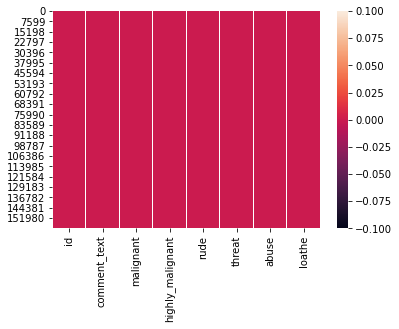

In [10]:
# Ltes check the null values using heatmap
sns.heatmap(malignant_train.isnull())

As we can see that there is no values present in this dataset

In [11]:
# There is an id column present in the dataset, since it's of no use, we can drop it from  the dataset

malignant_train.drop(['id'], axis=1, inplace= True)

In [12]:
malignant_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Let's perform Exploratory data analysis

In [13]:
features=malignant_train.columns[1:]
features

Index(['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], dtype='object')

In [14]:
# Let's check the average and maximum length of a comment

lens = malignant_train.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.138847284281, 590.7253812496405, 5000)

<AxesSubplot:>

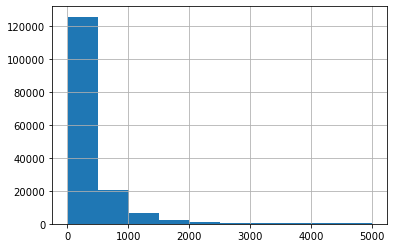

In [15]:
# Let's plot the length in a histogram
lens.hist()

In [16]:
# Let's check the correlation
malignant_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

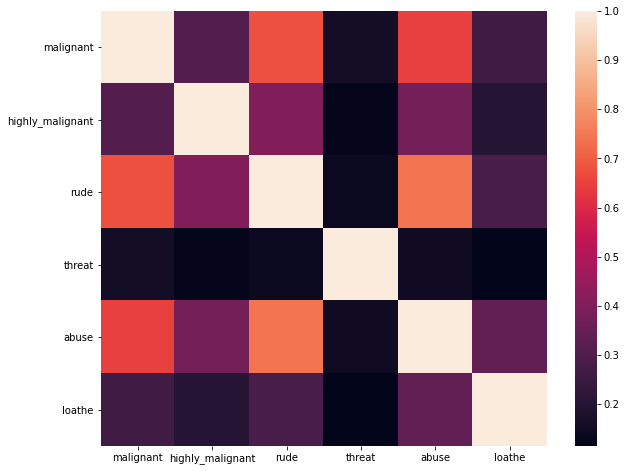

In [17]:
# Let's check the correlation via heatmap of all variables
plt.figure(figsize=(10,8))
sns.heatmap(malignant_train.corr())

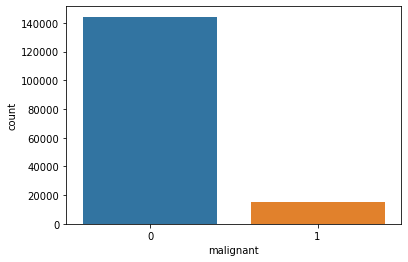

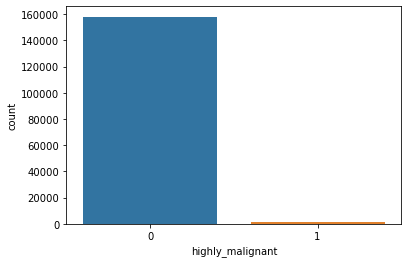

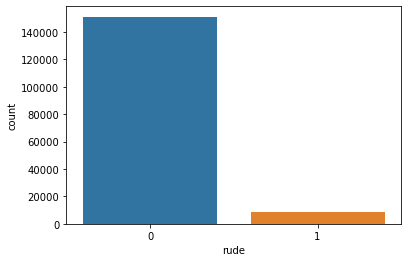

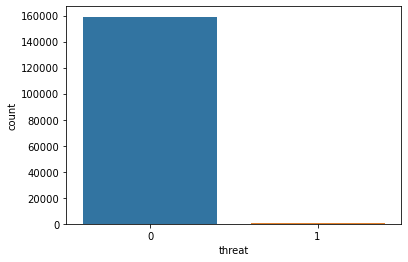

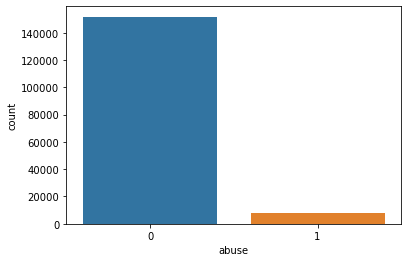

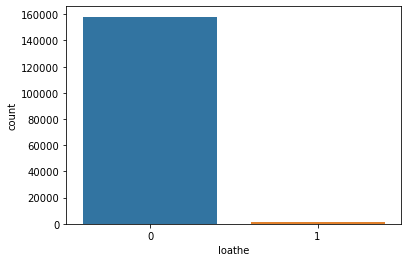

In [18]:
for i in features:
    sns.countplot(malignant_train[i])
    plt.show()

From the visualization, we can see that no. of positive comments are more than negative comments, but still there are some highly maglinant, rude and abuse comments.

In [19]:
# chechking the count of positive and negative comments in each categories

for i in features:
    print("Number of unique values in {}:{}".format(i, malignant_train[i].value_counts()))

Number of unique values in malignant:0    144277
1     15294
Name: malignant, dtype: int64
Number of unique values in highly_malignant:0    157976
1      1595
Name: highly_malignant, dtype: int64
Number of unique values in rude:0    151122
1      8449
Name: rude, dtype: int64
Number of unique values in threat:0    159093
1       478
Name: threat, dtype: int64
Number of unique values in abuse:0    151694
1      7877
Name: abuse, dtype: int64
Number of unique values in loathe:0    158166
1      1405
Name: loathe, dtype: int64


In [20]:
counts= malignant_train.iloc[:,1:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

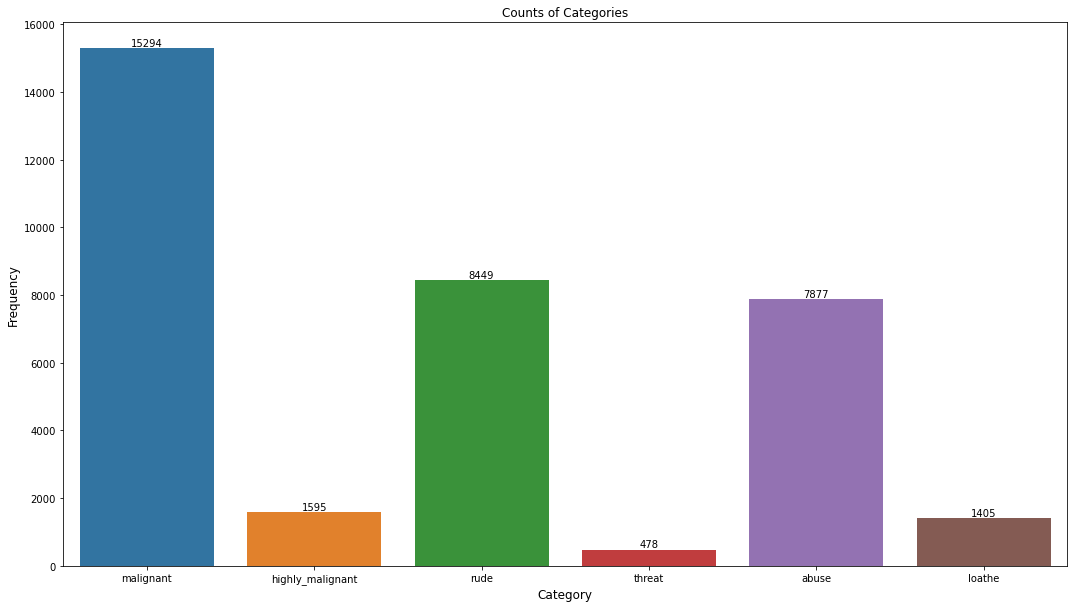

In [21]:
# Let's plot the counts of each category

plt.figure(figsize=(18,10))
ax=sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category', fontsize=12)
rects=ax.patches
labels=counts.values
for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [22]:
#Checking percentage of good and bad comments in dataset

good_comments = malignant_train[(malignant_train['malignant']!=1) & (malignant_train['highly_malignant']!=1) & (malignant_train['rude']!=1) & 
                            (malignant_train['threat']!=1) & (malignant_train['abuse']!=1) & (malignant_train['loathe']!=1)]
good_percent=len(good_comments)/len(malignant_train)*100
print('Percentage of good comments = ',good_percent)
print('Percentage of negative comments = ', (100-good_percent))

Percentage of good comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


In [23]:
# Adding new column comment_length to check length of comment_text characters

malignant_train['comment_length']=malignant_train.comment_text.str.len()
malignant_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [24]:
# Adding new column comment_length to check length of comment_text characters

malignant_test['comment_length']=malignant_test.comment_text.str.len()
malignant_test.head()

,id,comment_text,comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41


In [25]:
# Creating a new feature having Negative Comments and Non-Negative Comments from all features combinly.

malignant_train['label'] = malignant_train[features].max(axis=1)
malignant_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,70,0


In [26]:
malignant_train['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

# Pre-Processing

In [27]:
# import More librarues
import string
import re
# packages from gensim
from gensim import corpora
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess

# packages from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# packages from nltk
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
#Creating a function to filter using POS tagging.

def get_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [29]:
def Processed_data(comments):
    # Replace email addresses with 'email'
    comments=re.sub(r'^.+@[^\.].*\.[a-z]{2,}$',' ', comments)
        
    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    comments=re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',' ',comments)
        
    # getting only words(i.e removing all the special characters)
    comments = re.sub(r'[^\w]', ' ', comments) 
        
    # getting only words(i.e removing all the" _ ")
    comments = re.sub(r'[\_]', ' ', comments) 
    
    # getting rid of unwanted characters(i.e remove all the single characters left)
    comments=re.sub(r'\s+[a-zA-Z]\s+', ' ', comments)
    
    # Removing extra whitespaces
    comments=re.sub(r'\s+', ' ', comments, flags=re.I)

    #converting all the letters of the review into lowercase
    comments = comments.lower()
    
    # splitting every words from the sentences
    comments = comments.split()

    # iterating through each words and checking if they are stopwords or not,
    comments=[word for word in comments if not word in set(STOPWORDS)]
    
    # remove empty tokens
    comments = [text for text in comments if len(text) > 0]
    
    # getting pos tag text
    pos_tags = pos_tag(comments)

    # considering words having length more than 3only
    comments = [text for text in comments if len(text) > 3]        
   
    # performing lemmatization operation and passing the word in get_pos function to get filtered using POS ... 
    comments = [(WordNetLemmatizer().lemmatize(text[0], get_pos(text[1])))for text in pos_tags]

   # considering words having length more than 3 only
    comments = [text for text in comments if len(text) > 3]
    comments = ' '.join(comments)
    return comments

In [30]:
# Cleaning  and storing the comments in a separate feature.
malignant_train["clean_comment_text"] = malignant_train["comment_text"].apply(lambda x: Processed_data(x))

In [31]:
# Cleaning and storing the comments in a separate feature.
malignant_test["clean_comment_text"] = malignant_test["comment_text"].apply(lambda x: Processed_data(x))

In [32]:
# Adding new feature clean_comment_length to store length of cleaned comments in clean_comment_text characters
malignant_train['clean_comment_length'] = malignant_train['clean_comment_text'].apply(lambda x: len(str(x)))
malignant_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length,label,clean_comment_text,clean_comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,0,explanation edits username hardcore metallica ...,129
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,0,match background colour seemingly stuck thanks...,64
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,0,trying edit constantly removing relevant infor...,112
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,0,real suggestion improvement wondered section s...,315
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,0,hero chance remember page,25


In [33]:
malignant_test['clean_comment_length'] = malignant_test['clean_comment_text'].apply(lambda x: len(str(x)))
malignant_test.head()

,id,comment_text,comment_length,clean_comment_text,clean_comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367,bitch rule succesful whats hating mofuckas bit...,184
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50,title fine,10
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54,source zawe ashton lapland,26
3,00017563c3f7919a,":If you have a look back at the source, the in...",205,look source information updated correct form g...,109
4,00017695ad8997eb,I don't anonymously edit articles at all.,41,anonymously edit article,24


In [34]:
# Let's display the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Display_wordcloud(data,title):
    feedbackcloud = WordCloud(
        background_color = 'black',
        max_words = 1000,
        max_font_size = 40, 
        scale = 3,
        random_state = 25
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 10),facecolor='g')
    plt.axis('off')
    plt.imshow(feedbackcloud)
    plt.title(f"{title} words")
    plt.show()

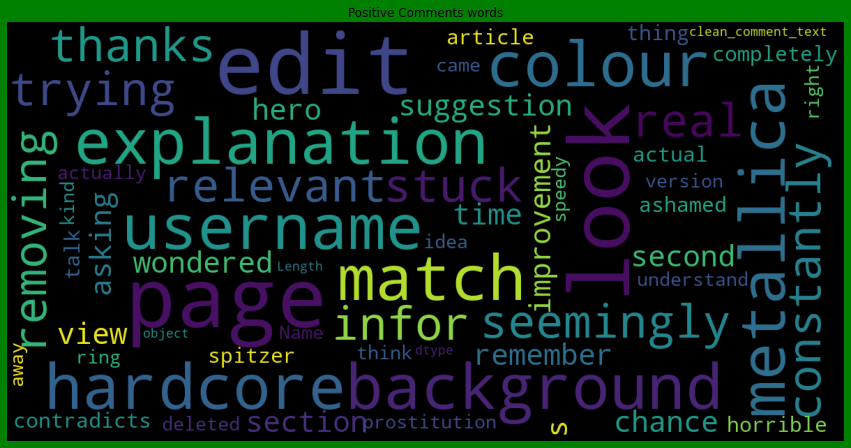

In [35]:
# Non-Negative/Good Comments - in training data

Display_wordcloud(malignant_train['clean_comment_text'][malignant_train['label']==0],"Positive Comments")

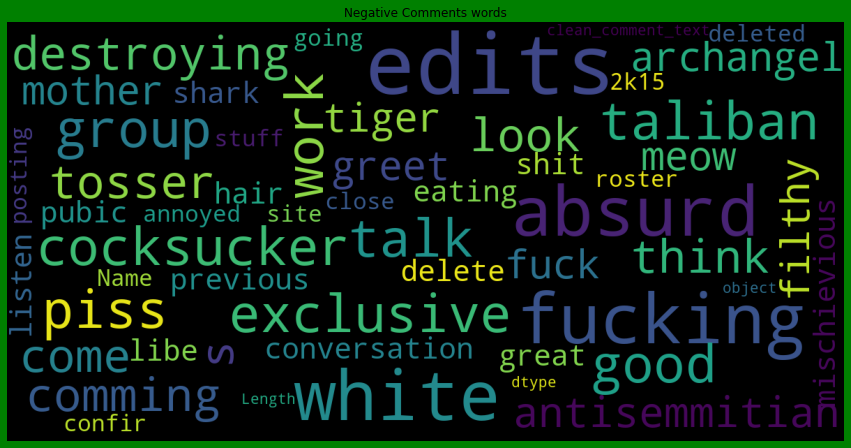

In [36]:
# Negative Comments - in training data
Display_wordcloud(malignant_train['clean_comment_text'][malignant_train['label']==1],"Negative Comments")

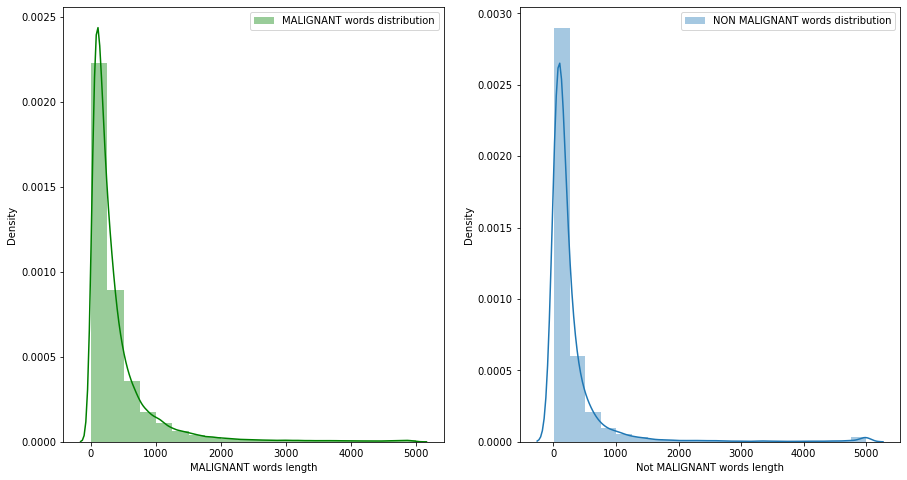

In [37]:
# Comments length distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(malignant_train[malignant_train['label']==0]['comment_length'],bins=20,ax=ax[0],label='MALIGNANT words distribution',color='g')

ax[0].set_xlabel('MALIGNANT words length')
ax[0].legend()

sns.distplot(malignant_train[malignant_train['label']==1]['comment_length'],bins=20,ax=ax[1],label='NON MALIGNANT words distribution')
ax[1].set_xlabel('Not MALIGNANT words length')
ax[1].legend()

plt.show()

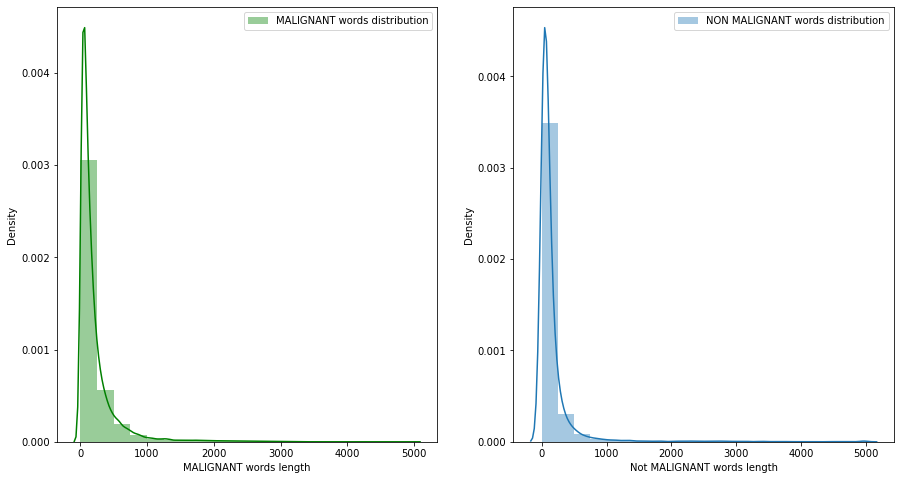

In [38]:
# Comments length distribution after cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(malignant_train[malignant_train['label']==0]['clean_comment_length'],bins=20,ax=ax[0],label='MALIGNANT words distribution',color='g')

ax[0].set_xlabel('MALIGNANT words length')
ax[0].legend()

sns.distplot(malignant_train[malignant_train['label']==1]['clean_comment_length'],bins=20,ax=ax[1],label='NON MALIGNANT words distribution')
ax[1].set_xlabel('Not MALIGNANT words length')
ax[1].legend()

plt.show()

# Model Building

In [39]:
# TF-IDF(term frequency–inverse document frequency) vectorizer
def Tf_idf_train(text):
    tfid = TfidfVectorizer(min_df=3,smooth_idf=False)
    return tfid.fit_transform(text)

In [40]:
# Splitting the training dataset into x and y
x=Tf_idf_train(malignant_train['clean_comment_text'])
x.shape

(159571, 43194)

In [41]:
y = malignant_train['label'].values
y.shape

(159571,)

In [42]:
# Importing libraries for model training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV


# Importing evaluation metrics for model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import log_loss

In [43]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30,stratify=y)

In [44]:
# Creating instances for different Classifiers
LR=LogisticRegression()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
SV=SVC()

In [45]:
# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('KNeighborsClassifier',KNN))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('SVC',SV))

LogisticRegression
LogisticRegression()
Learning Score :  0.9577704366198444
Accuracy Score :  0.9531458890374331
Cross Val Score :  0.9640649419707774
roc auc score :  0.7923891030143992
Log loss :  1.618287837423593
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     43004
           1       0.92      0.59      0.72      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



Confusion Matrix:
 [[42754   250]
 [ 1993  2875]]


MultinomialNB
MultinomialNB()
Learning Score :  0.9397487891565726
Accuracy Score :  0.9354737633689839
Cross Val Score :  0.9264906705491673
roc auc score :  0.6884622511658735
Log loss :  2.22865831088146
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     43004
           1       0.97      0.38    

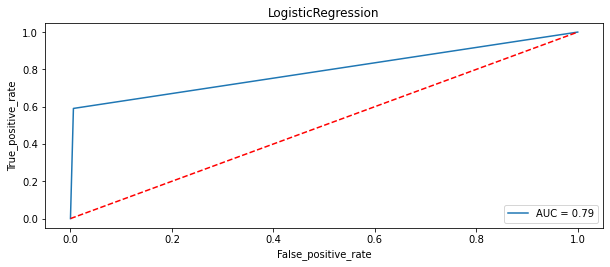

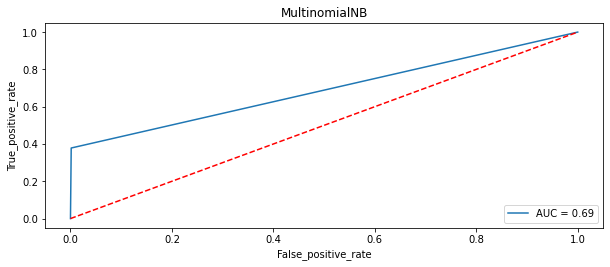

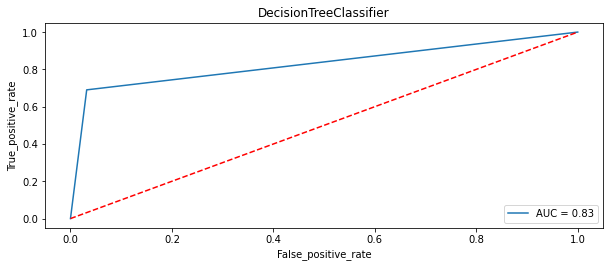

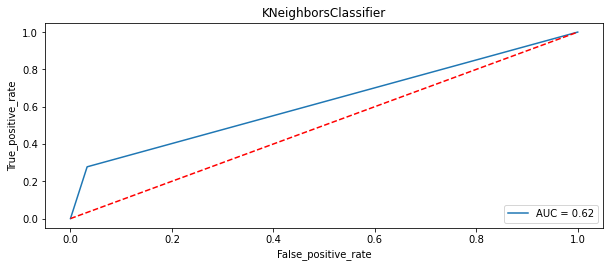

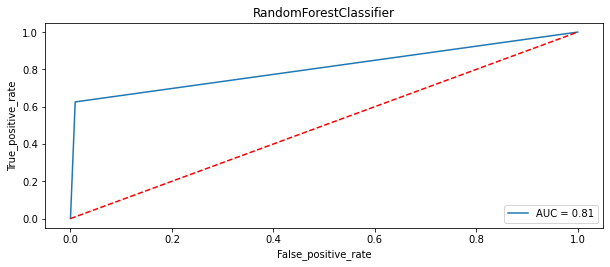

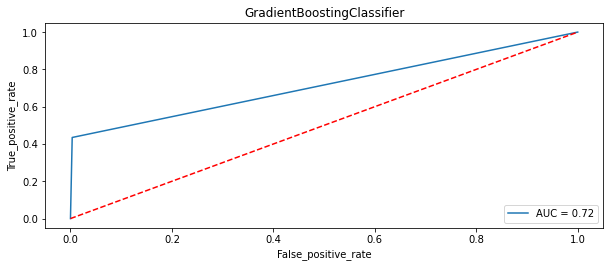

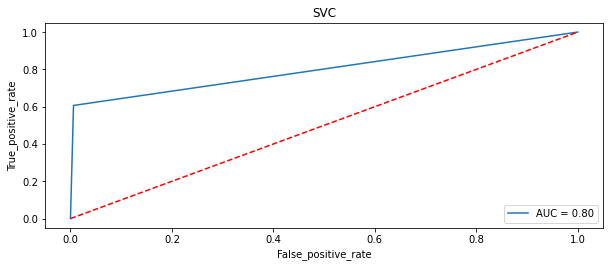

In [46]:
# Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score.

Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
lg_loss=[]

# For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print(name)
    Model.append(name)
    print(model)
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)
    model.fit(x_train,y_train)
    
# Learning Score
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    
# Cross_val_score
    cv_score=cross_val_score(model,x,y,cv=5,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
# Roc auc score
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)  

# Log Loss
    loss = log_loss(y_test,y_pred)
    print('Log loss : ', loss)
    lg_loss.append(loss)

# Classification Report     
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    

    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')

In [47]:
# Displaying scores :
results=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,'Auc_score':rocscore,'Log_Loss':lg_loss}) 
results

,Model,Learning Score,Accuracy Score,Cross Val Score,Auc_score,Log_Loss
0,LogisticRegression,95.777044,95.314589,96.406494,79.238910,1.618288
1,MultinomialNB,93.974879,93.547376,92.649067,68.846225,2.228658
2,DecisionTreeClassifier,99.826319,93.975602,83.394690,82.911242,2.080776
3,KNeighborsClassifier,92.353557,89.701705,69.054857,62.233465,3.556929
4,RandomForestClassifier,99.823633,95.356367,95.494720,80.810605,1.603861
5,GradientBoostingClassifier,94.187952,93.946357,88.990852,71.573128,2.090857
6,SVC,98.123528,95.458723,96.279660,80.029597,1.568506


# Looking at all the Scores, I have selected Random Forest


# Hyperparameter Tuning - Random Forest

In [48]:
from sklearn.model_selection import RandomizedSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30,stratify=y)
parameters={'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500, 800, 1200]}


LG=LogisticRegression()

# Applying Randomized Search CV for hyperparameter tuning with scoring= "accuracy"
rand = RandomizedSearchCV(estimator = RFC, param_distributions = parameters, 
                          n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='accuracy')
rand.fit(x_train,y_train)
rand.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 100,
 'bootstrap': False}

In [49]:
RFC=RandomForestClassifier(n_estimators= 500,
                           min_samples_split= 2,
                           min_samples_leaf=1,
                           max_depth= 100,
                           bootstrap= False)

In [61]:
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
pred=RFC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Log loss : ', log_loss(y_test,pred))
print('Confusion Matrix:',confusion_matrix(y_test,pred))
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy Score: 0.926199030748663
Log loss :  2.548995709189865
Confusion Matrix: [[42972    32]
 [ 3501  1367]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     43004
           1       0.98      0.28      0.44      4868

    accuracy                           0.93     47872
   macro avg       0.95      0.64      0.70     47872
weighted avg       0.93      0.93      0.91     47872



(2.5, -0.5)

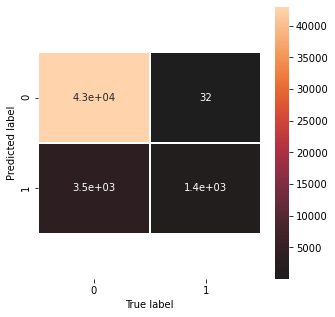

In [62]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, pred),annot=True,linewidths=1,center=0)
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Random Forest Classifier')

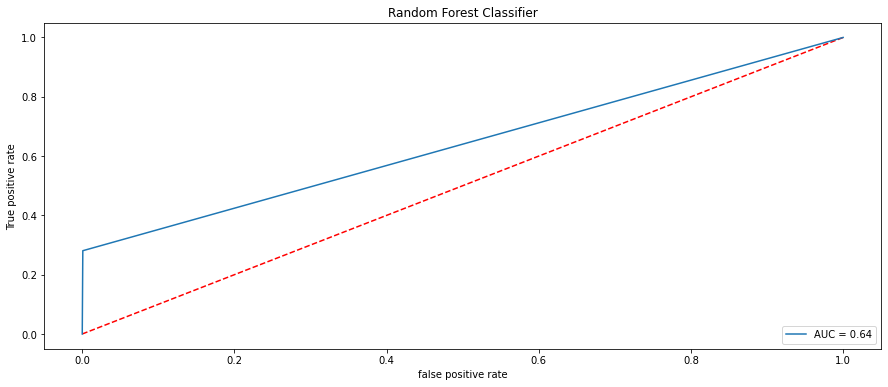

In [63]:
# Roc-Auc score
f,ax = plt.subplots(figsize = (15,6))
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred)
ax.plot([0,1],[0,1],'r--')
ax.plot(fpr,tpr,label='AUC = %0.2f'% roc_auc_score(y_test, pred))
ax.legend(loc='lower right')
ax.set_xlabel('false positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('Random Forest Classifier')

In [64]:
def Tf_idf_test(text):
    tfid = TfidfVectorizer(max_features=43194,smooth_idf=False)
    return tfid.fit_transform(text)

# PREDICTION

In [65]:
x_testing_data=Tf_idf_test(malignant_test['clean_comment_text'])

In [66]:
x_testing_data.shape

(153164, 43194)

In [67]:
Prediction=RFC.predict(x_testing_data)
malignant_test['Predicted values']=Prediction
malignant_test

,id,comment_text,comment_length,clean_comment_text,clean_comment_length,Predicted values
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367,bitch rule succesful whats hating mofuckas bit...,184,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50,title fine,10,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54,source zawe ashton lapland,26,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",205,look source information updated correct form g...,109,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,41,anonymously edit article,24,0
...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60,totally agree stuff long crap,29,0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198,throw field home plate faster throwing direct ...,85,0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423,okinotorishima category change agree correct g...,212,0
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502,founding nation germany return similar israel ...,275,0


In [68]:
malignant_test['Predicted values'].value_counts()

0    153119
1        45
Name: Predicted values, dtype: int64

In [69]:
malignant_test[malignant_test['Predicted values']==1].head(20)

,id,comment_text,comment_length,clean_comment_text,clean_comment_length,Predicted values
805,0153f7856280e9ad,::::That entry made a lot of sense to me. As I...,372,entry sense replying time came desk noticed wa...,174,1
3914,06b13661ec5c3e6b,""" \n\n ==Pelestinain Red Crescent Society and ...",990,pelestinain crescent society terrorism think p...,521,1
4568,07c5816cf1c0ffec,::Would you like to write up the Hegassen scro...,274,like write hegassen scroll entry publish soon ...,138,1
8358,0e02a435ccf5d6d1,== Franklin on Stalin == \n\n Possibly of inte...,382,franklin stalin possibly recently provided lin...,236,1
23370,26ffa274edf86566,==Ruud Lubbers entry== \n Hi Cary: What is hap...,485,ruud lubber entry cary happening page posted t...,219,1
25131,29e223fac14d609b,== Incorrectly titled articles by == \n\n You...,726,incorrectly titled article posted original wel...,324,1
25589,2ab006339fc4fdee,::::I use Google Earth. One has the option of ...,169,google earth option getting degree decimal for...,88,1
34462,394855c528d7c0d1,== Dude == \n\n We should form a rock band. Do...,147,dude form rock band prick pissed kissed opposite,48,1
34824,39ed57532158962a,""" \n\n About your Third Opinion request: The r...",385,opinion request request dispute removed declin...,239,1
36154,3c108d7fb2e8d80c,":Okay, but in 1918, the country was changed th...",278,okay 1918 country changed republic think write...,139,1


In [70]:
malignant_test.to_csv('Malignant_Predict.csv')

In [71]:
# Pickle file.
import joblib
joblib.dump(RFC,'Malignant_Predict.pkl')

['Malignant_Predict.pkl']